<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Extracting-Edison-related-emails" data-toc-modified-id="1.-Extracting-Edison-related-emails-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Extracting Edison related emails</a></span><ul class="toc-item"><li><span><a href="#Getting-Edison-related-people-list" data-toc-modified-id="Getting-Edison-related-people-list-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting Edison related people list</a></span></li></ul></li><li><span><a href="#2.-Splitting-emails-by-the-sent-hour-in-a-day" data-toc-modified-id="2.-Splitting-emails-by-the-sent-hour-in-a-day-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Splitting emails by the sent hour in a day</a></span><ul class="toc-item"><li><span><a href="#2.1-Apply-on-the-whole-corpus-(time-unit:-day)" data-toc-modified-id="2.1-Apply-on-the-whole-corpus-(time-unit:-day)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 Apply on the whole corpus (time unit: day)</a></span></li><li><span><a href="#2.2-Apply-on-the-whole-corpus-(time-unit:-week)" data-toc-modified-id="2.2-Apply-on-the-whole-corpus-(time-unit:-week)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 Apply on the whole corpus (time unit: week)</a></span></li><li><span><a href="#2.3-Apply-to-the-Edison-emails-(time-unit:-day/week)" data-toc-modified-id="2.3-Apply-to-the-Edison-emails-(time-unit:-day/week)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3 Apply to the Edison emails (time unit: day/week)</a></span></li></ul></li><li><span><a href="#3.-Email-representation-with-POS-tags" data-toc-modified-id="3.-Email-representation-with-POS-tags-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Email representation with POS tags</a></span><ul class="toc-item"><li><span><a href="#Visualizing-POS-in-vector-space" data-toc-modified-id="Visualizing-POS-in-vector-space-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing POS in vector space</a></span></li><li><span><a href="#Finding-abnormal-using-POS-vector" data-toc-modified-id="Finding-abnormal-using-POS-vector-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Finding abnormal using POS vector</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#POS-abbreviations" data-toc-modified-id="POS-abbreviations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>POS abbreviations</a></span></li></ul></li></ul></div>

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
import re
from IPython.display import Image

# 1. Extracting Edison related emails
If **word 'Edison' appears in the email title or the body**, the email is considered related  
**1028** relevant emails are found from the corpus(12016 emails).

In [3]:
df = pd.read_csv('edison_emails.csv',index_col=0)
df.head()

,From,Sent,To,CC,Subject,Attachments,Body
2860,['Linda Vaughn [mailto:linda.vaughn@cityoforla...,2013-02-15 14:29:00,"['Maddox, Scott; ali.fleming@talgov.com']","['Proctor, Bill; Minor, Rick', ' Majority Lead...",['Gun Violence Prevention Summit - Your help n...,[],"['', 'Hi Scott,', '', 'We need your help.', ''..."
4844,['Adam B Corey'],2013-11-20 08:44:00,['Nancy Miller; Sarah Valentine'],['Ryan Grindler'],['Edison Experience Invitation'],['Edison Experience Invitation.PDF; ATT03607.h...,"['', '', 'Hi Commissioner Miller,', '', 'Attac..."
4845,['Adam B Corey [mailto:acorey@101tally.com]'],2013-11-20 08:44:00,"['Miller, Nancy; Valentine, Sarah']",['Ryan Grindler'],['Edison Experience Invitation'],[],"['', 'Hi Commissioner Miller,', '', 'Attached ..."
4846,"['Miller, Nancy']",2013-11-20 12:22:00,"[""'Adam B Corey'""]",[],['RE: Edison Experience Invitation'],[],"['', '', 'Wow!', '', 'Nancy Miller', 'Mayor Pr..."
4850,"['Miller, Nancy']",2013-11-20 15:05:00,"[""'Adam B Corey'""]","['Valentine, Sarah']",['RE: Edison Experience Invitation'],[],"['', '', 'I am planning to come with a friend ..."


## Getting Edison related people list
A person is **considered related to the Edison project if he/she apppears in one of the related emails**

In [ ]:
f = open('edison_people_list.txt')
for line in f.readlines():
    print(line,end='')

# 2. Splitting emails by the sent hour in a day
The **24 hours of a day is splitted into 4 ranges** according to the regular work time. Specifically,  

**Before work: 4:00am - 8:00am  
Work time: 8:00am - 5:00pm   
After work: 5:00pm - 9:00pm  
Night time: 9:00pm - 4:00am**

**Ideally, we'd like to find hills on the curve of the emails sent in non-working time**

## 2.1 Apply on the whole corpus (time unit: day)

We only have 12000 emails distributed in 2000 days. In average, there are 6 emails every day. 1.5 emails in each time period per day. Using day as the time unit might be too small, since a little fluctuation will greatly disturb the percentage.

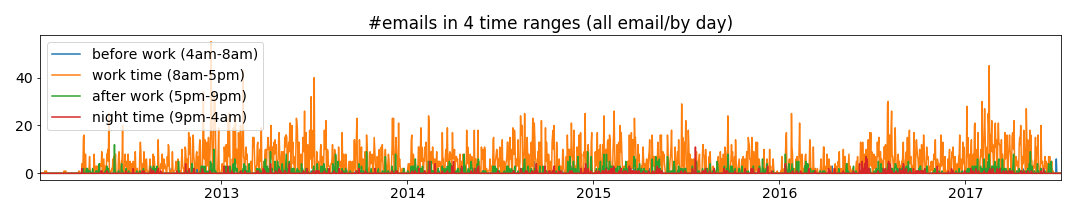

In [13]:
img = Image(filename='email_all_day.png')
img

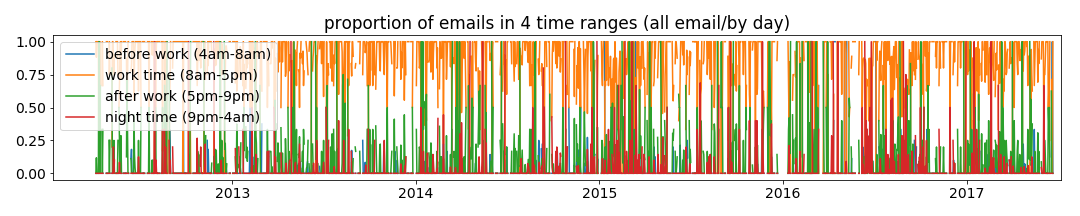

In [14]:
img = Image(filename='proportion_all_day.png')
img

## 2.2 Apply on the whole corpus (time unit: week)

Using week as the time unit can smooth the oscillation

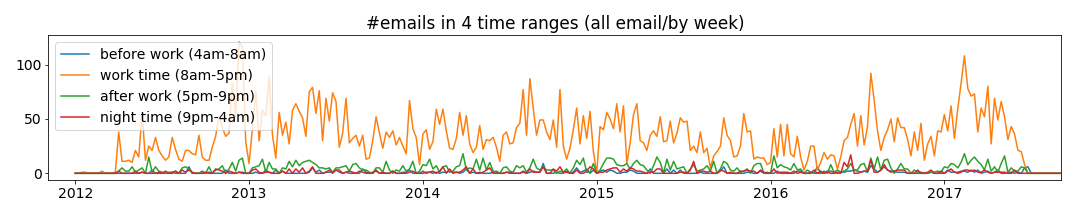

In [15]:
img = Image(filename='email_all_week.png')
img

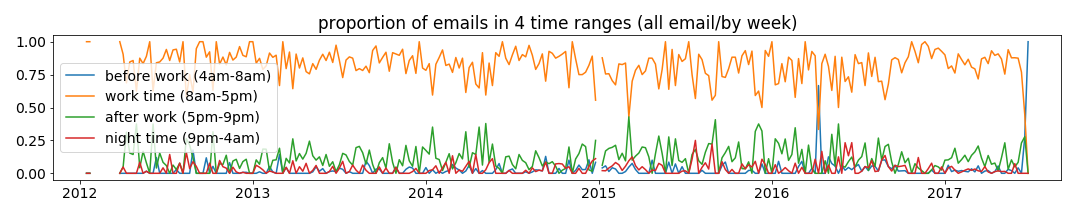

In [16]:
img = Image(filename='proportion_all_week.png')
img

## 2.3 Apply to the Edison emails (time unit: day/week)

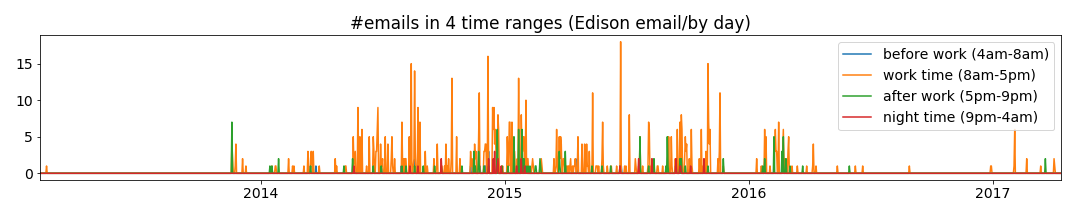

In [20]:
img = Image(filename='email_Edison_day.png')
img

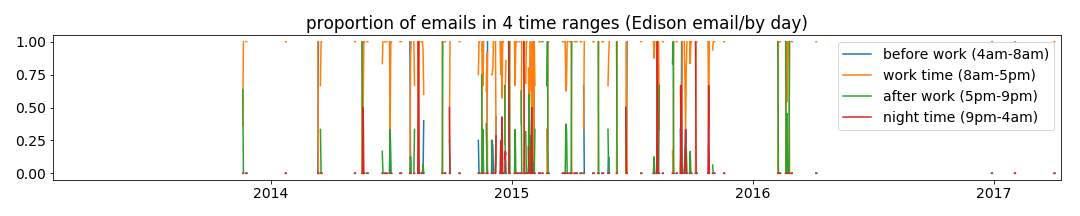

In [21]:
img = Image(filename='proportion_Edison_day.png')
img

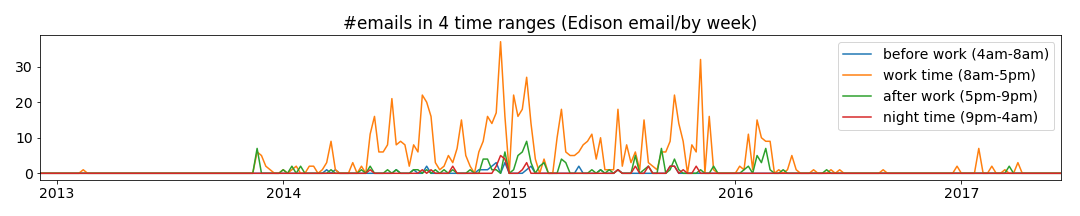

In [23]:
img = Image(filename='email_Edison_week.png')
img

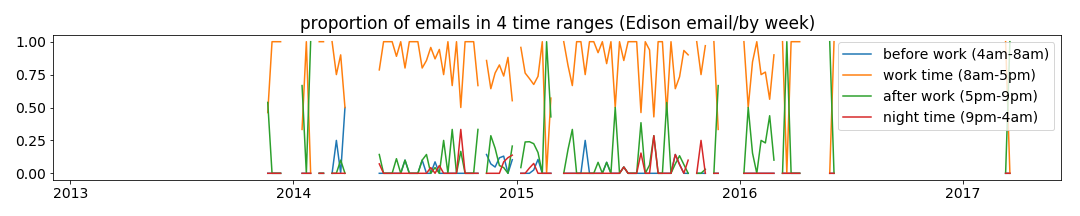

In [24]:
img = Image(filename='proportion_Edison_week.png')
img

# 3. Email representation with POS tags
**Each word in the original body is replaced by its POS tag. The order of word is ignored.  
Now each row, corresponding to an email, is a vector of 43.** (Unnormalized)

In [32]:
df_pos = pd.read_csv('pos_counts.csv',index_col=0)
df_pos.head()

,$,'',(,),",",.,:,CC,CD,DT,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.0,3.0,11.0,7.0,11.0,2.0,13.0,11.0,...,10.0,2.0,3.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,8.0,8.0,2.0,4.0,3.0,18.0,...,17.0,0.0,2.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0
4,0.0,0.0,8.0,8.0,21.0,14.0,56.0,11.0,30.0,38.0,...,26.0,0.0,3.0,3.0,4.0,7.0,0.0,2.0,0.0,0.0


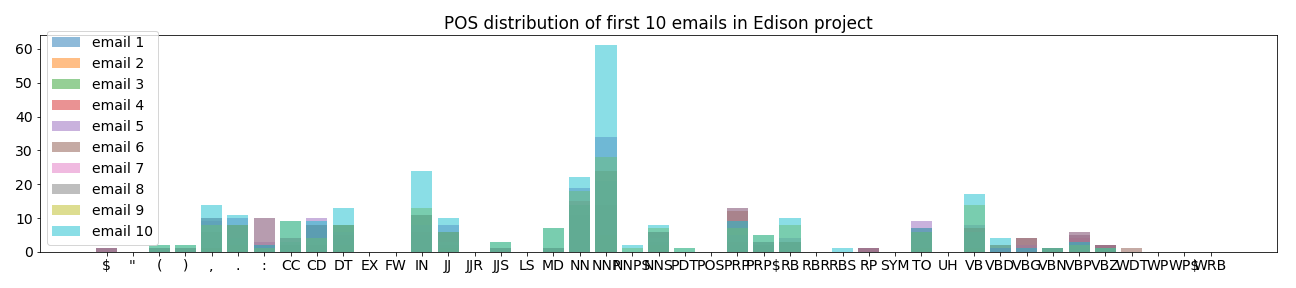

In [33]:
img = Image(filename='POS_distribution_Edison.png')
img

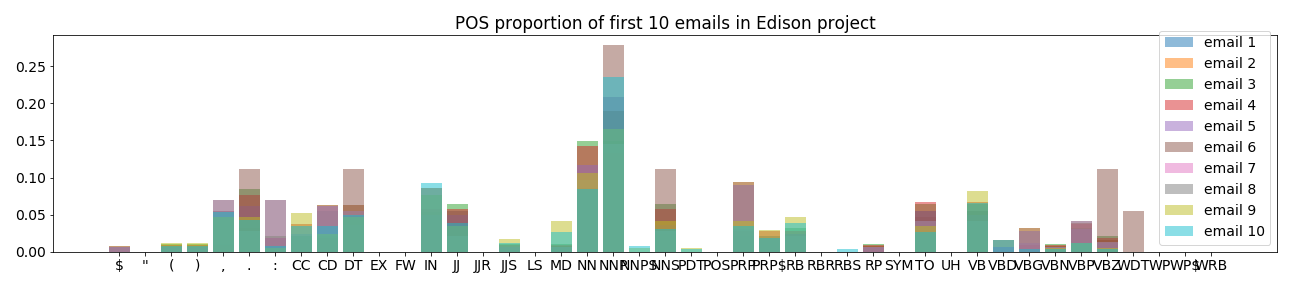

In [34]:
img = Image(filename='POS_proportion_Edison.png')
img

## Visualizing POS in vector space
**The POS data is a 1028*43 matrix. (Each email corresponds to a row. The row is normalized so that the summation of each row is 1)  
To visualize this matrix, PCA is applied. The number of dimension is reduced to 3.  
The 3 axis are the top 3 principle directions of the data.  
There are some outliers far from the group, which are interesting for us**  


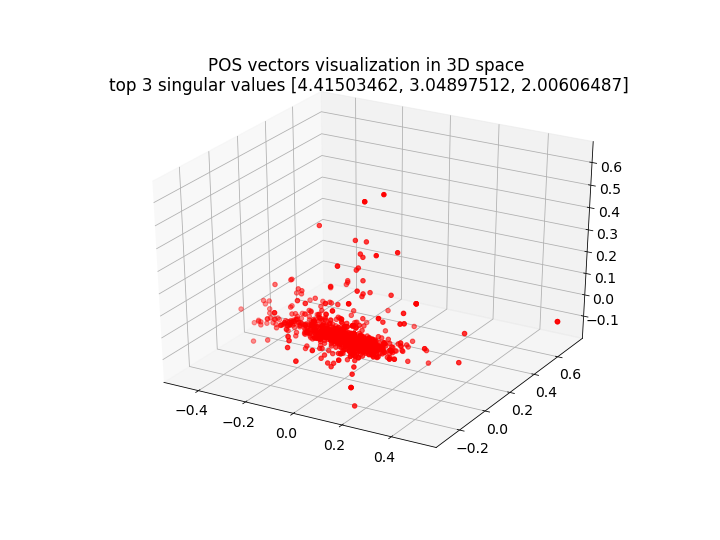

In [42]:
img = Image(filename='POS_3d.png')
img

## Finding abnormal using POS vector

**The outlier might be abnormal because the word usage is different from other emails**.  
The farthest one is email NO. 115 with a distance of **0.9850082**

In [43]:
df = pd.read_csv('new_clean_output.csv',index_col=0)
df.iloc[115]['Body']

"['', 'Thank you Sheila for your kind words. We have been blessed with great friends and clients that make our jobs a real joy. You and the Foundation are both to our agency. The credit goes to the team we have had for a long time over here that does a fantastic job.', '', 'Thank you for all that you and your Board does not only for our schools but for the community as a whole. The work all of you do inspires so many of us!', '', '']"

# Appendix
## POS abbreviations
https://sites.google.com/site/partofspeechhelp/  
https://www.guru99.com/pos-tagging-chunking-nltk.html

| Abbreviation 	| Meaning                                              	|
|--------------	|------------------------------------------------------	|
| CC           	| coordinating conjunction                             	|
| CD           	| cardinal digit                                       	|
| DT           	| determiner                                           	|
| EX           	| existential there                                    	|
| FW           	| foreign word                                         	|
| IN           	| preposition/subordinating conjunction                	|
| JJ           	| adjective (large)                                    	|
| JJR          	| adjective, comparative (larger)                      	|
| JJS          	| adjective, superlative (largest)                     	|
| LS           	| list market                                          	|
| MD           	| modal (could, will)                                  	|
| NN           	| noun, singular (cat, tree)                           	|
| NNS          	| noun plural (desks)                                  	|
| NNP          	| proper noun, singular (sarah)                        	|
| NNPS         	| proper noun, plural (indians or americans)           	|
| PDT          	| predeterminer (all, both, half)                      	|
| POS          	| possessive ending (parent\ 's)                       	|
| PRP          	| personal pronoun (hers, herself, him,himself)        	|
| PRP$         	| possessive pronoun (her, his, mine, my, our )        	|
| RB           	| adverb (occasionally, swiftly)                       	|
| RBR          	| adverb, comparative (greater)                        	|
| RBS          	| adverb, superlative (biggest)                        	|
| RP           	| particle (about)                                     	|
| TO           	| infinite marker (to)                                 	|
| UH           	| interjection (goodbye)                               	|
| VB           	| verb (ask)                                           	|
| VBG          	| verb gerund (judging)                                	|
| VBD          	| verb past tense (pleaded)                            	|
| VBN          	| verb past participle (reunified)                     	|
| VBP          	| verb, present tense not 3rd person singular(wrap)    	|
| VBZ          	| verb, present tense with 3rd person singular (bases) 	|
| WDT          	| wh-determiner (that, what)                           	|
| WP           	| wh- pronoun (who)                                    	|
| WRB          	| wh- adverb (how)                                     	|